In [9]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pip install --upgrade --force-reinstall git+https://github.com/FelipeSchreiber/BregmanClustering.git --no-deps
!pip install torch_geometric rpy2==3.5.1
import os
import pickle
from sys import platform
import BregmanTests
os.chmod(BregmanTests.__path__[0]+"/install_algos.sh",777)
if platform == "win32":
    os.environ["R_HOME"] = r"C:\\Program Files\R\R-4.2.3"
else:
    ### Uncomment line below if in Google Colab environment
    print(os.path.isfile(BregmanTests.__path__[0]+"/install_algos.sh"))
    ### Done

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/FelipeSchreiber/BregmanClustering.git to /tmp/pip-req-build-9iue31r0
  Running command git clone --filter=blob:none --quiet https://github.com/FelipeSchreiber/BregmanClustering.git /tmp/pip-req-build-9iue31r0
  Resolved https://github.com/FelipeSchreiber/BregmanClustering.git to commit 3809cdcdcb9d046624578c684bd302dfe1f5c7ff
  Preparing metadata (setup.py) ... done
  Created wheel for bregClust: filename=bregClust-1.0-py3-none-any.whl size=38367 sha256=ecb72e24c8982dadfdc9c52f330c9302c43cb8da57c0d3025924f0a347d201d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-656cmw5j/wheels/3f/90/fb/833529540c1d5f19c385fde761cc07c664c4b9a5edf7c6735b
Successfully built bregClust
  Attempting uninstall: bregClust
    Found existing installation: bregClust 1.0
    Uninstalling bregClust-1.0:
      Successfully uninstalled bregClust-1.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
True


In [11]:
from BregmanTests.benchmark import *
n_average = 20
n = 600
n_clusters = 2
d = 1
sizes = [ n // n_clusters ]*np.ones( n_clusters, dtype = int )

## Test 2_1

### Run numpy model

In [12]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,14,3)
r_range = np.linspace(0,0.7,3)*np.log(n)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False,
                    initializer = 'AIC',
                    hard_clustering=False)\
                  .run_2_1(n_average=1,
                            cluster_sizes=sizes,
                            b=5,
                            a_range= a_range,
                            r_range = r_range,
                            dense=False,
                            binary=True,
                           strategy = 3)
with open('test_2_1.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_1.pickle" "/content/drive/MyDrive"

0it [00:00, ?it/s]


SBM:  [[0.05330775 0.05330775]
 [0.05330775 0.05330775]]

Distribution Centers:  [[0.0, 0.0], [-0.0, 0.0]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.06063606 0.04504293]
 [0.04556773 0.06161277]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[-0.15625599 -0.01797849]
 [ 0.05286312 -0.13896081]]

ZTILDE:  [[246.31592908 249.88699108]
 [259.34269609 259.02266858]
 [184.117585   191.58284244]
 ...
 [256.64009076 251.64347374]
 [219.13868183 227.05952567]
 [186.34270383 185.78319109]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.05322743 0.05321522]
 [0.05322118 0.05321172]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[-0.05997985 -0.07389301]
 [-0.05790541 -0.07462933]]

ZTILDE:  [[247.29499163 247.29621942]
 [258.42535061 258.42627296]
 [187.23835439 187.23203965]
 ...
 [253.39559504 253.39396785]
 [222.35833224 222.35354035]
 [185.57299965 185.56543275]]

-------------------------

1it [00:06,  6.20s/it]


ZTILDE:  [[247.29531318 247.29531319]
 [258.42598857 258.42598858]
 [187.23387779 187.23387767]
 ...
 [253.39506634 253.39506632]
 [222.35527834 222.35527825]
 [185.56762009 185.56761994]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.05321944 0.05321944]
 [0.05321944 0.05321944]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[-0.0590156  -0.07423527]
 [-0.0590156  -0.07423527]]

attribute_means:  [[-0.0590156  -0.07423527]
 [-0.0590156  -0.07423527]] 
edge_means:  [[0.05321944 0.05321944]
 [0.05321944 0.05321944]] 
weight_means:  [[[1.]
  [1.]]

 [[1.]
  [1.]]]

SBM:  [[0.05330775 0.05330775]
 [0.05330775 0.05330775]]

Distribution Centers:  [[2.238925379325651, 0.0], [-2.238925379325651, 2.741892799320932e-16]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.05326667 0.05343333]
 [0.05352222 0.05265556]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[-2.23701503 -0.00830639]
 [ 2.174328

2it [00:17,  9.28s/it]


ZTILDE:  [[248.30425549 248.30425401]
 [262.66852541 262.66852179]
 [191.44556028 191.44555631]
 ...
 [258.03347828 258.0334823 ]
 [222.47081233 222.47081423]
 [183.57363279 183.57363305]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.05321944 0.05321944]
 [0.05321944 0.05321944]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[-0.03134349  0.01230781]
 [-0.03134346  0.01230781]]

attribute_means:  [[-0.03134349  0.01230781]
 [-0.03134346  0.01230781]] 
edge_means:  [[0.05321944 0.05321944]
 [0.05321944 0.05321944]] 
weight_means:  [[[1.]
  [1.]]

 [[1.]
  [1.]]]

SBM:  [[0.05330775 0.05330775]
 [0.05330775 0.05330775]]

Distribution Centers:  [[4.477850758651302, 0.0], [-4.477850758651302, 5.483785598641864e-16]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.05283333 0.05346667]
 [0.05348889 0.05308889]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[ 4.53061222  0.01953168]
 [-4.442322

3it [00:23,  7.92s/it]


ZTILDE:  [[266.18602593 266.18620938]
 [272.87855082 272.87870616]
 [202.55038459 202.55055004]
 ...
 [258.53372458 258.53362826]
 [225.066012   225.06592778]
 [195.46572536 195.46558123]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.05321944 0.05321944]
 [0.05321944 0.05321944]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[0.04414626 0.07811387]
 [0.04414387 0.07811391]]

attribute_means:  [[0.04414626 0.07811387]
 [0.04414387 0.07811391]] 
edge_means:  [[0.05321944 0.05321944]
 [0.05321944 0.05321944]] 
weight_means:  [[[1.]
  [1.]]

 [[1.]
  [1.]]]

SBM:  [[0.10128472 0.05330775]
 [0.05330775 0.10128472]]

Distribution Centers:  [[0.0, 0.0], [-0.0, 0.0]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.10167317 0.0535246 ]
 [0.05345793 0.10086257]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[ 0.06998193  0.057274  ]
 [ 0.00063771 -0.18877888]]

ZTILDE:  [[336.17774153 365.99556769

4it [00:29,  7.05s/it]


ZTILDE:  [[345.79930466 345.79930459]
 [315.51880229 315.51880231]
 [257.65023849 257.65023839]
 ...
 [325.11542684 325.11542671]
 [308.45675249 308.45675239]
 [273.2813145  273.28131425]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.07738333 0.07738333]
 [0.07738333 0.07738333]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[ 0.03554097 -0.06493227]
 [ 0.03554097 -0.06493227]]

attribute_means:  [[ 0.03554097 -0.06493227]
 [ 0.03554097 -0.06493227]] 
edge_means:  [[0.07738333 0.07738333]
 [0.07738333 0.07738333]] 
weight_means:  [[[1.]
  [1.]]

 [[1.]
  [1.]]]

SBM:  [[0.10128472 0.05330775]
 [0.05330775 0.10128472]]

Distribution Centers:  [[2.238925379325651, 0.0], [-2.238925379325651, 2.741892799320932e-16]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.10167317 0.0535246 ]
 [0.05345793 0.10086257]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[ 2.21811923  0.00374072]
 [-2.303190

5it [00:35,  6.54s/it]


ZTILDE:  [[347.56449666 347.56449932]
 [316.51388662 316.51388905]
 [260.57887458 260.57887774]
 ...
 [326.612083   326.61208095]
 [316.67659647 316.67659063]
 [276.90913751 276.9091333 ]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.07738333 0.07738333]
 [0.07738333 0.07738333]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[-0.02746459  0.01195008]
 [-0.02746462  0.01195008]]

attribute_means:  [[-0.02746459  0.01195008]
 [-0.02746462  0.01195008]] 
edge_means:  [[0.07738333 0.07738333]
 [0.07738333 0.07738333]] 
weight_means:  [[[1.]
  [1.]]

 [[1.]
  [1.]]]

SBM:  [[0.10128472 0.05330775]
 [0.05330775 0.10128472]]

Distribution Centers:  [[4.477850758651302, 0.0], [-4.477850758651302, 5.483785598641864e-16]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.10205556 0.05346667]
 [0.05348889 0.10052222]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[ 4.50426807  0.00659915]
 [-4.494326

6it [00:42,  6.85s/it]


ZTILDE:  [[351.82758872 351.82763792]
 [327.6034569  327.6035225 ]
 [282.10100208 282.10108945]
 ...
 [329.02496571 329.0249314 ]
 [316.82014614 316.82009798]
 [282.53957338 282.53951532]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.07738333 0.07738333]
 [0.07738333 0.07738333]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[0.00497107 0.02388199]
 [0.00497026 0.023882  ]]

attribute_means:  [[0.00497107 0.02388199]
 [0.00497026 0.023882  ]] 
edge_means:  [[0.07738333 0.07738333]
 [0.07738333 0.07738333]] 
weight_means:  [[[1.]
  [1.]]

 [[1.]
  [1.]]]

SBM:  [[0.14926169 0.05330775]
 [0.05330775 0.14926169]]

Distribution Centers:  [[0.0, 0.0], [-0.0, 0.0]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.1509     0.05346667]
 [0.05348889 0.1485    ]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[ 0.05388497 -0.02596114]
 [ 0.06425916  0.04361826]]

ZTILDE:  [[363.87484662 431.7072967 

7it [00:48,  6.50s/it]


ZTILDE:  [[381.78841309 381.78841294]
 [382.10466641 382.10466609]
 [333.8000022  333.80000154]
 ...
 [383.75818704 383.75818683]
 [387.87760101 387.87760074]
 [346.61765413 346.61765367]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.10158889 0.10158889]
 [0.10158889 0.10158889]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[0.05907206 0.00882856]
 [0.05907206 0.00882856]]

attribute_means:  [[0.05907206 0.00882856]
 [0.05907206 0.00882856]] 
edge_means:  [[0.10158889 0.10158889]
 [0.10158889 0.10158889]] 
weight_means:  [[[1.]
  [1.]]

 [[1.]
  [1.]]]

SBM:  [[0.14926169 0.05330775]
 [0.05330775 0.14926169]]

Distribution Centers:  [[2.238925379325651, 0.0], [-2.238925379325651, 2.741892799320932e-16]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.1509     0.05346667]
 [0.05348889 0.1485    ]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[ 2.20150134e+00 -3.97571207e-02]
 [-2.226421

8it [00:56,  6.94s/it]


ZTILDE:  [[386.45697821 386.4569841 ]
 [381.76021828 381.76022017]
 [342.75072087 342.75072895]
 ...
 [383.88739551 383.88739351]
 [391.36837725 391.36837207]
 [349.07279623 349.07279151]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.10158889 0.10158889]
 [0.10158889 0.10158889]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[-0.01246    -0.02097535]
 [-0.01246003 -0.02097535]]

attribute_means:  [[-0.01246    -0.02097535]
 [-0.01246003 -0.02097535]] 
edge_means:  [[0.10158889 0.10158889]
 [0.10158889 0.10158889]] 
weight_means:  [[[1.]
  [1.]]

 [[1.]
  [1.]]]

SBM:  [[0.14926169 0.05330775]
 [0.05330775 0.14926169]]

Distribution Centers:  [[4.477850758651302, 0.0], [-4.477850758651302, 5.483785598641864e-16]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.1509     0.05346667]
 [0.05348889 0.1485    ]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[ 4.40909425  0.01649433]
 [-4.480030

9it [01:04,  7.16s/it]


ZTILDE:  [[389.95080188 389.95083619]
 [392.91956999 392.91961225]
 [343.19675179 343.19678944]
 ...
 [389.7701696  389.77013892]
 [398.54523382 398.54518927]
 [352.61976069 352.61972988]]

-----------------------------------------------------------
 
EDGE_MEANS:  [[0.10158889 0.10158889]
 [0.10158889 0.10158889]] 
Weight_MEANS:  [[[1.]
  [1.]]

 [[1.]
  [1.]]] 
Att_MEANS:  [[-0.0354679  -0.01399004]
 [-0.03546835 -0.01399004]]

attribute_means:  [[-0.0354679  -0.01399004]
 [-0.03546835 -0.01399004]] 
edge_means:  [[0.10158889 0.10158889]
 [0.10158889 0.10158889]] 
weight_means:  [[[1.]
  [1.]]

 [[1.]
  [1.]]]


### Run torch model

In [5]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,14,3)
r_range = np.linspace(0,0.7,3)*np.log(n)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=True,
                    initializer = 'chernoff')\
                  .run_2_1(n_average=1,
                            cluster_sizes=sizes,
                            b=5,
                            a_range= a_range,
                            r_range = r_range,
                            dense=False,
                            binary=True)
with open('test_2_1.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_1.pickle" "/content/drive/MyDrive"

0it [00:00, ?it/s]



SBM:  [[0.05330775 0.05330775 0.05330775]
 [0.05330775 0.05330775 0.05330775]
 [0.05330775 0.05330775 0.05330775]]

Distribution Centers:  [[0.0, 0.0], [-0.0, 0.0], [-0.0, -0.0]]


TypeError: ignored

## Test 2_2

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
d_range = np.arange(1,6)
mu_range = np.linspace(0,6,20)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_torch=False
                  )\
                  .run_2_2(n_average=10,
                            cluster_sizes=sizes,
                             d_range = d_range,
                             mu_range = mu_range,
                             dense=True,
                             binary=False)
with open('test_2_2.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_2.pickle" "/content/drive/MyDrive"

## Test 2_3

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
d_range = np.arange(1,5)
a_range = np.linspace(5,14,10)
lambda_range = np.arange(1,6)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_torch=False
                 )\
                  .run_2_3(n_average=10,
                            cluster_sizes=sizes,
                            d_range= d_range,
                            lambda_range = lambda_range,
                            a_range = a_range,
                            b = 5,
                            dense=False,
                            binary=False)
with open('test_2_3.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_3.pickle" "/content/drive/MyDrive"

## Test 2_4

In [ ]:
attributes_distribution = "exponential"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
att_averages = np.linspace(1,5,10)
w_averages = np.linspace(1,5,10)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False
                 )\
                  .run_2_4(n_average=10,
                            cluster_sizes=sizes,
                            b = 5,
                            w_averages=w_averages,
                            att_averages=att_averages)
with open('test_2_4.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_4.pickle" "/content/drive/MyDrive"

## Test 2_5

In [ ]:
attributes_distribution = "exponential"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
att_averages = np.linspace(1,5,5)
w_averages = np.array([1,3,6,9,12])
stats = BregmanBenchmark(att_variance=n_average,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False
                 )\
                  .run_2_5(n_average=n_average,
                            cluster_sizes=sizes,
                            b = 5,
                            w_averages=w_averages,
                            att_averages=att_averages)
with open('test_2_5.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_5.pickle" "/content/drive/MyDrive"

In [ ]:
test_2_5=None
with open("/content/drive/MyDrive/test_2_5.pickle", 'rb') as handle:
    test_2_5 = pickle.load(handle)
test_2_5.keys()
df = pd.DataFrame.from_dict(test_2_5)
# labels = [ 'EM-GMM', 'SC', 'Algo1', 'attSBM','IR_sLS']
# algos = ["attributes", "graph", "ours", "attSBM", "IR_sLS"]
# saveFig = True
# for varying in ["graph","attributes"]:
#   curves = []
#   curves_std = []
#   for algo in algos:
#     curves.append(df.loc[(df['varying'] == varying) & (df['algorithm'] == algo)]["ARI"])
#     curves_std.append(df.loc[(df['varying'] == varying) & (df['algorithm'] == algo)]["ARI_std"])
#   if varying == 'graph':
#     x = df.loc[(df['varying'] == "graph")]["weights_avg"].unique()    
#     fileName = 'N_' + str(n) + '_K_' + str(n_clusters) + '_att_' + str(2)  +  '_nAverage' + str(n_average) + '.jpeg'
#     plotting( x, curves, labels, curves_std = curves_std, xticks = x, xlabel = 'weights_avg', saveFig = True, fileName = fileName )
#     plt.close()
#   elif varying == 'attributes':
#     x = df.loc[(df['varying'] == "attributes")]["attributes_avg"].unique()
#     fileName = 'N_' + str(n) + '_K_' + str(n_clusters) + '_w_' + str(2) + '_nAverage_' + str(n_average) + '.jpeg'
#     plotting( x , curves, labels, curves_std = curves_std, xticks = x, xlabel = 'attributes_avg', saveFig = True, fileName = fileName )
#     plt.close()

## Test Real Data

In [ ]:
attributes_distribution = "bernoulli"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
scores = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False)\
                  .run_real_data(strategy=2)
scores

In [ ]:
"""
Using strategy 3:
{'dataset': ['Cornell', 'Texas', 'Wisconsin', 'Cora', 'CiteSeer'],
 'ARI': [0.021333077187108966,
  0.02158094558247706,
  0.06561886114111304,
  0.09454483715306834,
  0.021826025060071436]}

Using strategy 2:
{'dataset': ['Cornell', 'Texas', 'Wisconsin', 'Cora', 'CiteSeer'],
 'ARI': [0.03939352761342101,
  0.010729257144094815,
  0.02099802199154118,
  0.017692041355841813,
  0.022351217692019844]}
"""


In [ ]:
# attributes_distribution = "gaussian"
# edge_distribution = "bernoulli"
# weight_distribution = "exponential"
# BregmanBenchmark(att_variance=1,
#                     attributes_distribution=attributes_distribution,
#                     weight_variance=1,
#                     weight_distribution=weight_distribution,
#                     edge_distribution=edge_distribution,
#                     run_torch=False)\
#                  .run_test(n_average=n_average,cluster_sizes=sizes,\
#                  b=5,\
#                  a_range=[ 5,7,9,11,13,15 ],\
#                  r_range = [ 0,1,2,3,4,5 ],\
#                  dense=False,\
#                  binary=True,\
#                  file_endings=".jpeg",\
#                  n_iters=25)

# Begin Plots

In [13]:
from BregmanTests.utils import *

In [14]:
test_2_1=None
with open("/content/drive/MyDrive/test_2_1.pickle", 'rb') as handle:
    test_2_1 = pickle.load(handle)
test_2_1.keys()

dict_keys(['a', 'r', 'ARI'])

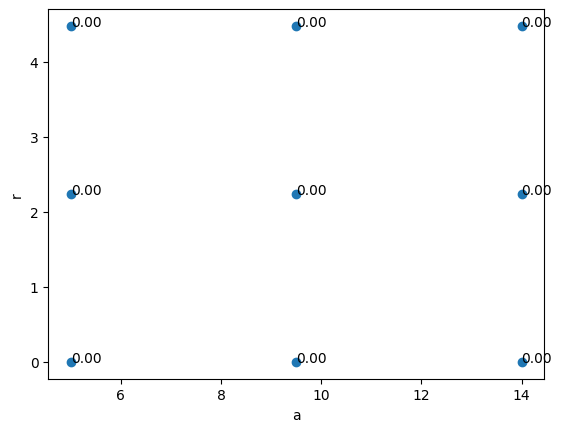

In [15]:
def scatter_(dict_,x_name,y_name,z_name):
  fig, ax = plt.subplots()
  x,y = dict_[x_name],dict_[y_name]
  ax.scatter(x,y)
  for i, txt in enumerate(dict_[z_name]):
      ax.annotate("{:.2f}".format(txt), (x[i], y[i]))
  ax.set_xlabel(x_name)
  ax.set_ylabel(y_name)
scatter_(test_2_1,'a', 'r', 'ARI')

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
x,y,z = test_2_1["a"],test_2_1["r"],test_2_1["ARI"]
xlabel="a"
ylabel="r"
ticks = np.linspace(0, 1, 5, endpoint=True)
C = ax.scatter(x=x,y=y,c=z,cmap="coolwarm")
cb = fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI',ticks=ticks)
cb.set_label(label='ARI', size=SIZE_LEGEND)
cb.ax.tick_params(labelsize=SIZE_TICKS)
plt.xlabel( xlabel, fontsize = SIZE_LABELS )
plt.ylabel( ylabel, fontsize = SIZE_LABELS )
plt.xticks( fontsize = SIZE_TICKS )
plt.yticks( fontsize = SIZE_TICKS )
plt.show()

In [ ]:
test_2_4=None
SIZE_TITLE = 24
SIZE_LABELS = 24
SIZE_TICKS = 18
SIZE_LEGEND = 18
with open("/content/drive/MyDrive/test_2_4.pickle", 'rb') as handle:
    test_2_4 = pickle.load(handle)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
x,y,z = np.array(test_2_4["lambda_att"]),np.array(test_2_4["lambda_w"]),np.array(test_2_4["ARI"])
xlabel="attributes_avg"
ylabel="weights_avg"
C = ax.scatter(x=1/x,y=1/y,c=z,cmap="coolwarm")
plt.ylim(0.9,3.5)
ticks = np.linspace(z.min(), z.max(), 5, endpoint=True)
cb = fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI',ticks=ticks)
cb.set_label(label='ARI', size=SIZE_LEGEND)
cb.ax.tick_params(labelsize=SIZE_TICKS)
plt.xlabel( xlabel, fontsize = SIZE_LABELS )
plt.ylabel( ylabel, fontsize = SIZE_LABELS )
plt.xticks( fontsize = SIZE_TICKS )
plt.yticks( fontsize = SIZE_TICKS )
plt.show()

In [ ]:
x,y,z = test_2_1["a"],test_2_1["r"],test_2_1["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0]).T
make_contour_plot(vals_x,vals_y,z,x_label="a",y_label="r",filename="contour_plot_2_1.jpeg")

In [ ]:
test_2_2=None
with open("/content/drive/MyDrive/test_2_2.pickle", 'rb') as handle:
    test_2_2 = pickle.load(handle)
test_2_2.keys()

In [ ]:
scatter_(test_2_2,'d', 'mu', 'ARI')

In [ ]:
x,y,z = test_2_2["d"],test_2_2["mu"],test_2_2["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
# x,y = np.meshgrid(vals_x,vals_y)
z = np.array(z).reshape(len(vals_x),len(vals_y)).T
make_contour_plot(vals_x,vals_y,z,x_label="d",y_label="mu",filename="contour_plot_2_2.jpeg")

In [ ]:
test_2_3=None
with open("/content/drive/MyDrive/test_2_3.pickle", 'rb') as handle:
    test_2_3 = pickle.load(handle)
test_2_3.keys()

In [ ]:
x,y,z,data = test_2_3["d"],test_2_3["lambda"], test_2_3["a"],test_2_3["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
vals_z = np.unique(z)
"""
len(X) == N is the number of columns in data,
len(Y) == M is the number of rows in data.
len(Z) == P is the depth of data
DATA = M x N X P
"""
X = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
data = np.array(data).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
x_label="d"
y_label="lambda"
z_label = "a"

kw = {
        # 'vmin': data.min(),
        # 'vmax': data.max()
    }

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot contour surfaces
    ### This is the X x Y plane for z=zmax 
_ = ax.contourf(
            X[:, :, -1], Y[:, :, -1], data[:, :, -1],
            zdir='z', offset=zmax, **kw
        )
    
    ### This is the X x Y plane for z=zmin 
_ = ax.contourf(
            X[:, :, 0], Y[:, :, 0], data[:, :, 0],
            zdir='z', offset=zmin, **kw
        )

    ### This is the X x Z plane for y=ymax 
_ = ax.contourf(
            X[-1, :, :], data[-1, :, :], Z[-1, :, :],
            zdir='y', offset=ymax, **kw
        )

    ### This is the X x Z plane for y=ymin 
_ = ax.contourf(
            X[0, :, :], data[0, :, :], Z[0, :, :],
            zdir='y', offset=ymin, **kw
        )

    ### This is the Y x Z plane for x=xmax 
_ = ax.contourf(
            data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
            zdir='x', offset=xmax, **kw
        )

    ### This is the Y x Z plane for x=xmin
C = ax.contourf(
            data[:, 0, :], Y[:, 0, :], Z[:, 0, :],
            zdir='x', offset=xmin, **kw
        )


# Plot edges
edges_kw = dict(color='0.4', linewidth=1,zorder=-1e3)
ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )

# Set zoom and angle view
ax.view_init(30, 45, 0)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI')

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )
C = ax.scatter(xs=X,ys=Y,zs=Z,c=data)
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.2, label='ARI')
plt.show()